## Chapter 2 Object-Oriented Programming
### 2.1.1 Object-Oriented design goals
  - Robustness
  - Adaptability
  - Reusability

### 2.1.2 Object-Oriented design principles
- **Modularity**
  As a real-world analogy, a house or apartment can be viewed as consisting ofseveral interacting units: electrical, heating and cooling, plumbing, and structural.Rather than viewing these systems as one giant jumble of.wires,vents,pipes, andboards, the organized architect designing a house or apartment wilview them asseparate modules that interact in well-defined ways.
  
 <br>
 
- **Abstraction**
Python has a tradition of treating abstraction simplicitly using a mechanism known as duck typing. As an interpreted and dynamically typed language, there is no "compile time"’" checking of data types inPython, and no formal requirement for declarations of abstract base classes. Instead, programmers assume that an object supports a set of known behaviors, with the interpreter raising a run-time error if those assumptions fail. The description of this as "duck typing"comes from an adage attributed to poet James Whitcomb Riley, stating that "when I see a bird that walks like a duck and swims like a duck and quacks like a duck, I call that bird a duck,"

In [ ]:
# Example of Duck Typing

class Duck:
    def __init__(self):
        pass
    
    def quack(self):
        print('Quack!')
        
class Human():
    def quack(self):
        print('I can make "Quack" sound like a duck.')
        
def make_it_quack(duck):
    duck.quack()
    
donald = Duck()
john_doe = Human()

# Here, the make_it_quack function works with both Duck and Person objects because both have a quack method. Python does not enforce that duck must be of type Duck; it only cares that duck has a quack method.

make_it_quack(donald)
make_it_quack(john_doe)

In [ ]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @abstractmethod
    def make_sound(self):
        pass

class Dog(Animal):
    def make_sound(self):
        return "Woof!"

class Cat(Animal):
    def make_sound(self):
        return "Meow!"

# animal = Animal()  # This will raise an error: Can't instantiate abstract class Animal with abstract methods make_sound

dog = Dog()
cat = Cat()

print(dog.make_sound())  # Outputs: Woof!
print(cat.make_sound())  # Outputs: Meow!



- Encapsulation



## Design Pattern

This book present several design patterns in this book, and we show how they can be consistently applied to implementations of data structures and algorithms. These design patterns fall into two groups patterns for solving algorithm design problems and patterns for solving software engineering problems. 
The **algorithm design patterns** we discuss include the following:
Recursion (Chapter 4)
Amortization (Sections 5.3 and 11.4)
Divide-and-conquer (Section 12.2.1)
Prune-and-search, also known as decrease-and-conquer (Section 12.7.1)
Brute force (Section 13.2.1)
Dynamic programming (Section 13.3).The greedy method (Sections 13.4.2, 14.6.2, and 14.7)
</br>
Likewise, the **software engineering design patterns** we discuss include:
Iterator (Sections 1.8 and 2.3.4)
Adapter (Section 6.1.2)
Position (Sections 7.4 and 8.1.2)
Composition (Sections 7.6.1, 9.2.1, and 10.1.4)
Template method (Sections 2.4.3, 8.4.6, 10.1.3, 10.5.2, and 11.2.1)
Locator (Section 9.5.1)
Factory method (Section 11.2.1)


### 2.3 Class Definition

In [95]:
"""
Here's a example of CreditCard Class definition
"""
class CreditCard:
    """A consumer credit card."""
    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance
        
        The initial balance is zero
        
        customer  the name of the customer (e.g. 'John Roman')
        bank      the name of the bank (e.g. 'California Saving')
        acnt      the account identifier (e.g. '5522 3991 3332 2344')
        limit     credit limit (measured in dollars) 
        """
        
        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0
        
    def get_customer(self):
        """return the name of customer"""        
        return self._customer
    
    def get_bank(self):
        """return the name of bank"""
        return self._bank
    
    def get_acnt(self):
        """return the account number, typically in string"""
        return self._acnt
    
    def get_limit(self):
        """return current credit limit"""
        return self._limit
    
    def get_balance(self):
        """return current balance"""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if the charge was processed; False if charge was denied.
        """
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        """Process customer payment that reduces balance"""
        self._balance -= amount
        return self._balance
    

if __name__ == '__main__':
    wallet = []
    wallet.append(CreditCard('Jonathan Doe', 'AAB', '3211 4819 7777 4919', 2500))
    wallet.append(CreditCard('Jonathan Doe', 'BBC', '1211 4819 8888 4919', 3500))
    wallet.append(CreditCard('Jonathan Doe', 'CCA', '3211 4819 9999 4919', 5000))
    for val in range(1,17):
        wallet[0].charge(val)
        wallet[1].charge(val*2)
        wallet[2].charge(val*3)
        
    for c in range(3):
        print(f"Customer = {wallet[c].get_customer()}")
        print(f"Bank = {wallet[c].get_bank()}")
        print(f"Account = {wallet[c].get_acnt()}")
        print(f"Limit = {wallet[c].get_limit()}")
        print(f"Balance = {wallet[c].get_balance()}")
        while wallet[c].get_balance() > 100:
            wallet[c].make_payment(100)
            print(f"New Balance = {wallet[c].get_balance()}")
        print()


Customer = Jonathan Doe
Bank = AAB
Account = 3211 4819 7777 4919
Limit = 2500
Balance = 136
New Balance = 36

Customer = Jonathan Doe
Bank = BBC
Account = 1211 4819 8888 4919
Limit = 3500
Balance = 272
New Balance = 172
New Balance = 72

Customer = Jonathan Doe
Bank = CCA
Account = 3211 4819 9999 4919
Limit = 5000
Balance = 408
New Balance = 308
New Balance = 208
New Balance = 108
New Balance = 8


In [ ]:
"""Example Multidimensional Vector Class
   To demonstrate the use of operator overloading via special method.
"""

class Vector:
    def __init__(self, dims):
        """Create d-dimensional vector of zero"""
        self.dims = dims
        self.vector = [0] * dims
        
    def __len__(self):
        """Return the dimension of the vector"""
        return len(self.vector)

    def __getitem__(self, j):
        """Return the jth coordinate of vector"""
        return self.vector[j]
    
    def __setitem__(self, j, value):
        """Set jth coordinate of vector to given value"""
        self.vector[j] = value
        return self.vector
    
    def __add__(self, other):
        """Return the sum of two vector"""
        if len(self.vector) != len(other.vector):
            raise ValueError('Two Vectors must have the same length!')
        return [self.vector[i]+ other.vector[i] for i in range(len(self.vector))]
    
    def __eq__(self, other):
        """"""
        if self.vector == other.vector:
            return True
    
    def __ne__(self, other):
        if self.vector != other.vector:
            return True
    
    def __str__(self):
        return '<' + str(self.vector[:]) + '>'
    
v_a = Vector(3)
v_b = Vector(3)
v_a[0] = 19
v_a[-1] = -3
v_b[-1]= 8
total = 0
for entry in v_a:
    total += entry


print(v_a+v_b)
print(v_a[:])
print(total)
print(v_a)

In [ ]:
"""An Example to demonstrate how an iterator works"""

class SequenceIterator:
    """An iterator for any of Python's sequence types"""
    def __init__(self, sequence):
        """Create an iterator for a given sequence"""
        self._seq = sequence
        self._k = -1
        
    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        self._k += 1
        if self._k <= len(self._seq):
            return self._seq[self._k]
        else:
            raise StopIteration()
        
    def __iter__(self):
        """By convention, an iterator must return itself as an iterator."""
        return self
    
    
    

In [ ]:
"""A Range Class Example"""

class Range:
    """A class that mimic's the python build-in class range."""
    def __init__(self, start, stop=None, step=1):
        """Initialize a Range instance
        Semantics is similar to the build-in range class.
        """
        
        if step == 0:
            raise ValueError('step cannot be 0')
        
        if stop is None:  # special case as range(n)
            start, stop = 0, start # should be treated as range(0, n)
        
        self._length = max(0, (stop-start+step-1)//step)
        self._start = start
        self._step = step
        
    def __len__(self):
        """Return number of entries of the range"""
        return self._length
    
    def __getitem__(self, j):
        """Return the entry at index k (using standard interpretation if negative"""
        if j < 0:
            j += self._length
            
        if 0 <= j < self._length:
            raise IndexError('index out of Range')

        return self._start + j* self._step
    


In [ ]:
"""Extending the CreditCard class by using super() method to demonstrate the mechanisms for inheritance"""

class PredatoryCreditCard(CreditCard):
    """Create a new predatory credit card instance.
    
    The initial balance is zero
    
    customer  the name of the customer (e.g., 'John Bowman')
    bank      the name of the bank (e.g., 'California Savings)
    acnt      the account identifier (e.g., '5391 0375 9387 5309') 
    limit     credit limit (measured in dollars)
    apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
    """
    
    def __init__(self, customer, bank, acnt, limit, apr):
        super().__init__(customer, bank, acnt, limit)
        self._apr = apr
        
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        
        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        success = super().charge(price)   # call inherited method
        if not success:
            self._balance += 5
        return success # caller expects return value
    
    def process_month(self):
        """Access monthly interest outstanding balance."""
        if self._balance > 0:
            monthly_interest = pow(1+self._apr, 1/12)
            self._balance *= monthly_interest
        
            
        
    
        

## 2.4.2 Hierarchy of Numeric Progression

In [128]:
class Progression:
    def __init__(self, start=0):
        self._current = start
        
    def __iter__(self):
        return self
    
    def _advance(self):
        """ Update self._current to a new value.
        
        This should be overridden by a subclass to customize progression
        
        By convention, if current is set to None, this designates the end of a finite progression. 
        """
        self._current += 1
    
    def __next__(self):
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance()
            return answer
        
    def print_progression(self, n):
        """ Print the next n value of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))
        
ps = Progression(10)
ps.print_progression(11)

10 11 12 13 14 15 16 17 18 19 20


In [ ]:
class ArithmeticProgression(Progression):
    def __init__(self,increment=1,start=0):
        """Create a new arithmetic progression class
        :param increment: the fix constant to add to each term (default 1)
        :param start:     the first term of progression (default 0) 
        """
        super().__init__(start)
        self._increment = increment
        
    def _advance(self):
        """Update self._current value by adding the fixed increment"""
        self._current += self._increment
        
        
ap = ArithmeticProgression(3, 5)

ap.print_progression(20)   

In [ ]:
class GeometricProgression(Progression):
    def __init__(self, base=2, start=1):
        """Create a new geometric progression class
        :param base:   the fix constant multiplied to each term ( default 2)
        :param start:  the first term of progression （ default 1)
        """
        super().__init__(start)
        self._base = base
        
    def _advance(self):
        """Update self._current value by multiplying the base value."""
        self._current *= self._base
        

gp = GeometricProgression(9,3)

gp.print_progression(10)

In [ ]:
class FibonacciProgression(Progression):
    def __init__(self, first=0, second=1):
        """Iterator producing a generalized Fibonacci progression
        :param first:    the first term of the progression (default 0)
        :param second:   the second term of the progression (default 1)
        """
        self._prev = second - first
        super().__init__(first)
        
    def _advance(self):
        """Update self._current and self._prev value by taking sum of previous two."""
        self._prev, self._current = self._current, self._prev + self._current
        
fb = FibonacciProgression()
fb.print_progression(10)

In [ ]:
"""Test our Progression class family"""

if __name__ == '__main__':
    print("Default progression:")
    Progression().print_progression(10)
    
    print("Arithmatic Progression with increment 5.")
    ArithmeticProgression(5).print_progression(10)
    
    print("Arithmetic Progression with increment 5 and start 2")
    ArithmeticProgression(5, 2).print_progression(10)
    
    print("Geometric Progression with default base.")
    GeometricProgression().print_progression(10)
    
    print("Geometric Progression with base 3 and default start")
    GeometricProgression(3).print_progression(10)
    
    print("Fibonacci Progression with default start")
    FibonacciProgression().print_progression(10)
    
    print("Fibonacci Progression with start values 4 and 6")
    FibonacciProgression(4,6).print_progression(10)

## 2.4.3 Abstract Based Classes 


In [ ]:
"""In this implementation, I create a 'MySubClass' to indicate how to create a subclass by through an AbstractBaseClass. When we use abstractmethod, it means we ensure the rule that all the subclass must include __len__() and __getitem__() method. And all the subclass can use those concrete method like index(), __contains__(), count()"""
from abc import ABCMeta, abstractmethod

class Sequence(metaclass=ABCMeta):
    @abstractmethod
    def __len__(self):
        """Return the length of the sequence"""
    
    @abstractmethod
    def __getitem__(self, j):
        """Return the element at index j of the sequence"""
    
    def __contains__(self, val):
        """Return True if val found in sequence, False otherwise."""
        for i in range(len(self)):
            if val == self[i]:
                return True
        return False
            
    def index(self, val):
        """Return leftmost index at which val is found (or raise ValueError)"""
        for i in range(len(self)):
            if val == self[i]:
                return i
        raise ValueError
        
    def count(self, val):
        """Return the number of elements equal to given value."""
        k = 0
        for i in range(len(self)):
            if val == self[i]:
                k +=1
        return k

class MySubClass(Sequence):
    def __init__(self,seq):
        self._seq = seq
        
    def __len__(self):
        return len(self._seq)
        
    def __getitem__(self, j):
        return self._seq[j]
    
msc = MySubClass([1,3,3,3,5,7,7,8,9])
print(msc[3])
print(len(msc))
print(msc.count(7))
print(msc.index(5))
print(3 in msc)
    

## 2.5 Namespaces and Object-Orientation
## 2.5.1 Instance and Class Namespaces

In [ ]:
"""Class Data Members
A Class-level data member is often used when there is some value, such as a constant, that is to be shared by all instances of a class.  
As a sample, we revisit the PredatoryCreditCard 
"""

class PredatoryCreditCard(CreditCard):
    OVERLIMIT_FEE = 5
    
    def charge(self, price):
        success = super().charge(price)
        if not success:
            self._balance += PredatoryCreditCard.OVERLIMIT_FEE
        return success
    
pcc = PredatoryCreditCard('Jenny','CBB','1100 1110 1001 1011', 500)
print(pcc.get_balance())
print(pcc.charge(5000))
print(pcc.get_balance())

In [ ]:
"""1. You can use .__dict__ method to check what namespaces does an instance contain (and this mechanism require extra memory of your system.) 
   2. By the code fragment below you can see, we actually can add a variable to a instance by using [instance_name].[variable_name] = value (We can see this as a benefit of dynamic programing language, compare to static programing language.
   3. To avoid the extra-memory-used problem in 1. , we can use __slots__ method as a solution 
   4. Additionally, __slots__ method can also limit variables of a Class, so if I write a code like " __slots__ = ('x', 'y')" inside the declaration of ExampleClass, I can't add other variables (such as 'z') to instances of ExampleClass, and I can't use __dict__ to show all variables of ExampleClass as well (because it hadn't created one when it was created).
   5. If you set up a subclass of ExampleClass, you can use __dict__ and add new variable to the instance dynamically. However, when you use __dict__ method to show all variables, it won't show those had define in __slots__". Or, if you want to make sure all inheritances to avoid creation of instance dictionaries, you should also declare __slots__ in your subclasses.   
"""
pcc1 = PredatoryCreditCard('Jenny1','CBB','1100 1110 1001 1011', 500)
print(pcc.__dict__)
pcc.x =3
print(pcc.__dict__)
print(pcc.x)

class ExampleClass:
    __slots__ = ('x','y')

class SubExampleClass(ExampleClass):
    pass

sec = SubExampleClass()   
sec.x = 10
sec.z = 100
print(sec.__dict__)
print('sec.x = ', sec.x)
ec = ExampleClass()
ec.x = 10
print('ec.x = ', ec.x)
ec.z = 50

In [ ]:
ec.__dict__

## 2.6 Shallow and Deep copy

In [ ]:
class Color:
    def __init__(self, r, g, b):
        self._red = r
        self._green = g
        self._blue = b

warm_color = [Color(249, 124, 43), Color(169, 163, 52)]

# no new list creat, just a reference:
palette = warm_color
print('warm color ID:', id(warm_color))
print('content of warm color[0]:', warm_color[0].__dict__)
print('palette ID as reference:', id(palette))
print('content of palette[0]:', palette[0].__dict__)

# shallow copy ( different id, can delete element of list, but share same content)
palette = list(warm_color)
print('warm color ID:', id(warm_color))
print('content of warm color:', warm_color)
print('palette ID :', id(palette))
print('content of palette:', palette)
palette.pop()
print('content of warm color after pop:', warm_color)
print('content of palette after pop:', palette)
palette[0]._red = 99
print('content of warm color after edit value:', warm_color[0].__dict__)
print('content of palette after edit value:', palette[0].__dict__)

# deep copy, by using the module 'copy'
import copy

warm_color = [Color(249, 124, 43), Color(169, 163, 52)]
palette = copy.deepcopy(warm_color)
print('warm color ID:', id(warm_color))
print('palette ID:', id(palette))
palette[0]._red = 99
print('content of warm color[0] value:', warm_color[0].__dict__)
print('content of palette[0] value:', palette[0].__dict__)


## 2.7 Exercises
### Reinforcement

In [ ]:
"""
R-2.1 Give three examples of life-critical software applications.
"""
print('1. Automatic Driving \n2. Remote surgery\n3. Software in heart monitor')

In [ ]:
"""R-2.2 Give an example of a software application in which adaptability can mean the difference between a prolonged lifetime of sales and bankruptcy.
"""
print('E-commerce platforms billions of business expand their client group to all over the world.')

In [ ]:
"""R-2.3 Describe a component from a text-editor GUI and the methods that it encapsulates."""
print('The main text area in a text-editor GUI which can capture and show what user had input is a usually in the middle, white area.')
print('It usually has three main components:\n  1. A background which simulates the same function of paper. Where showing the content of the text file. \n  2. Contents which can be both read from the original file or typed by the current user. \n  3. Cursor which is a flashing object to indicate current input position. ')

In [ ]:
"""R-2.4 Write a Python class, Flower, that has three instance variables of type str, int, and float, that respectively represent the name of the flower, its number of petals, and its price. Your class must include a constructor method that initializes each variable to an appropriate value, and your class should include methods for setting the value of each type, and retrieving the value of each type."""

class Flower:
    def __init__(self, name, petals, price):
        """
        :param name:    type str, as the name of the flower
        :param petals:  type int, as the number of petals
        :param price:   type float, as the price of the flower
        """
        self._name = str(name)
        self._petals = int(petals)
        self._price = float(price)
    
    def get_name(self):
        return self._name
    
    def get_petals(self):
        return self._petals
    
    def get_price(self):
        return self._price
    
    def set_name(self, newname):
        self._name = str(newname)
    
    def set_petals(self, new_num):
        self._petals = int(new_num)
        
    def set_price(self, new_price):
        self._price = float(new_price)

# Test the class
rose = Flower('Rose', 100, 2.5)
print(rose.get_name())
print(rose.get_petals())
print(rose.get_price())
rose.set_name('Big Rose')
rose.set_petals(1000)
rose.set_price(3.5)
print(rose.get_name())
print(rose.get_petals())
print(rose.get_price())
    
        

In [ ]:
"""R-2.5 Use the techniques of Section 1.7 to revise the charge and make_payment methods of the CreditCard class to ensure that the caller sends a number as a parameter."""

class CreditCard:
    """A consumer credit card."""
    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance
        
        The initial balance is zero
        
        customer  the name of the customer (e.g. 'John Roman')
        bank      the name of the bank (e.g. 'California Saving')
        acnt      the account identifier (e.g. '5522 3991 3332 2344')
        limit     credit limit (measured in dollars) 
        """
        
        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0
        
    def get_customer(self):
        """return the name of customer"""        
        return self._customer
    
    def get_bank(self):
        """return the name of bank"""
        return self._bank
    
    def get_acnt(self):
        """return the account number, typically in string"""
        return self._acnt
    
    def get_limit(self):
        """return current credit limit"""
        return self._limit
    
    def get_balance(self):
        """return current balance"""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if the charge was processed; False if charge was denied.
        """
        if not isinstance(price, (int, float)):
            raise TypeError
        
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        """Process customer payment that reduces balance"""
        
        if not isinstance(amount, (int, float)):
            raise TypeError
        self._balance -= amount
        return self._balance
        
            
new_card = CreditCard('John', 'CBC', '1100 1001 1010 0100', 50)
print(new_card.get_balance())
try:
    new_card.charge('dd')
except TypeError:
    print('You need to pass a number as parameter.')

try:
    new_card.make_payment('dd')
except TypeError:
    print('You need to pass a number as parameter.')


In [ ]:
"""R-2.6 If the parameter to the make_payment method of the CreditCard class were a negative number, that would have the effect of raising the balance on the account. Revise the implementation so that it raises a ValueError if a negative value is sent."""

class CreditCard:
    """A consumer credit card."""
    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance
        
        The initial balance is zero
        
        customer  the name of the customer (e.g. 'John Roman')
        bank      the name of the bank (e.g. 'California Saving')
        acnt      the account identifier (e.g. '5522 3991 3332 2344')
        limit     credit limit (measured in dollars) 
        """
        
        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0
        
    def get_customer(self):
        """return the name of customer"""        
        return self._customer
    
    def get_bank(self):
        """return the name of bank"""
        return self._bank
    
    def get_acnt(self):
        """return the account number, typically in string"""
        return self._acnt
    
    def get_limit(self):
        """return current credit limit"""
        return self._limit
    
    def get_balance(self):
        """return current balance"""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if the charge was processed; False if charge was denied.
        """
        if not isinstance(price, (int, float)):
            raise TypeError
        
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        """Process customer payment that reduces balance"""
        
        if amount < 0:
            raise ValueError
        self._balance -= amount
        return self._balance

new_card = CreditCard('Moo', 'CCB', '1020 2010 1200 2100', 500) 
try:
    new_card.make_payment(-50)
except ValueError:
    print('ValueError: This method do not accept negative number.')

In [ ]:
"""R-2.7 The CreditCard class of Section 2.3 initializes the balance of a new account to zero. Modify that class so that a new account can be given a nonzero balance using an optional fifth parameter to the constructor. The four-parameter constructor syntax should continue to produce an account with zero balance."""

class CreditCard:
    """A consumer credit card."""
    def __init__(self, customer, bank, acnt, limit, balance=0):
        """Create a new credit card instance
        
        The initial balance is zero
        
        customer  the name of the customer (e.g. 'John Roman')
        bank      the name of the bank (e.g. 'California Saving')
        acnt      the account identifier (e.g. '5522 3991 3332 2344')
        limit     credit limit (measured in dollars) 
        balance   set a default value for balance, but user still can pass a customized value optionally.
        """
        
        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = balance
        
    def get_balance(self):
        return self._balance
    
new_card1 = CreditCard('Moo', 'CCB', '1020 2010 1200 2100', 500) 
new_card2 = CreditCard('Moo', 'CCB', '1020 2010 1200 2100', 500, 100)
print("new card 1 balance:", new_card1.get_balance())
print('new card 2 balance:', new_card2.get_balance())

In [ ]:
"""R-2.8 Modify the declaration of the first for loop in the CreditCard tests, from Code Fragment 2.3, so that it will eventually cause exactly one of the three credit cards to go over its credit limit. Which credit card is it?"""

class CreditCard:
    """A consumer credit card."""
    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance
        
        The initial balance is zero
        
        customer  the name of the customer (e.g. 'John Roman')
        bank      the name of the bank (e.g. 'California Saving')
        acnt      the account identifier (e.g. '5522 3991 3332 2344')
        limit     credit limit (measured in dollars) 
        """
        
        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0
        
    def get_customer(self):
        """return the name of customer"""        
        return self._customer
    
    def get_bank(self):
        """return the name of bank"""
        return self._bank
    
    def get_acnt(self):
        """return the account number, typically in string"""
        return self._acnt
    
    def get_limit(self):
        """return current credit limit"""
        return self._limit
    
    def get_balance(self):
        """return current balance"""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if the charge was processed; False if charge was denied.
        """
        if not isinstance(price, (int, float)):
            raise TypeError
        
        if price + self._balance > self._limit:
            print(f'{self._bank} reach credit limit.')
            raise ValueError
            
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        """Process customer payment that reduces balance"""
        
        if amount < 0:
            raise ValueError
        self._balance -= amount
        return self._balance
    
wallet = []
wallet.append(CreditCard('Jonathan Doe', 'AAB', '3211 4819 7777 4919', 2500))
wallet.append(CreditCard('Jonathan Doe', 'BBC', '1211 4819 8888 4919', 3500))
wallet.append(CreditCard('Jonathan Doe', 'CCA', '3211 4819 9999 4919', 5000))
for val in range(1,60):
    try:
        wallet[0].charge(val)
        wallet[1].charge(val*2)
        wallet[2].charge(val*3)
        print('current val', val)
        print('wallet1(AAB):', wallet[0].get_balance())
        print('wallet2(BBC):', wallet[1].get_balance())
        print('wallet3(CCA):', wallet[2].get_balance())
    except ValueError:
        print(f"Credit limit exceeded at {val}")
        break


In [21]:
"""R-2.9 Implement the __sub__ method for the Vector class of Section 2.3.3, so that the expression u−v returns a new vector instance representing the difference between two vectors."""
"""R-2.10 Implement the __neg__ method for the Vector class of Section 2.3.3, so that the expression −v returns a new vector instance whose coordinates are all the negated values of the respective coordinates of v."""
"""R-2.11 In Section 2.3.3, we note that our Vector class supports a syntax such as v = u + [5, 3, 10, -2, 1], in which the sum of a vector and list returns a new vector. However, the syntax v = [5, 3, 10, -2, 1] + u is illegal. Explain how the Vector class definition can be revised so that this syntax generates a new vector."""
"""R-2.12 Implement the __mul__ method for the Vector class of Section 2.3.3, so that the expression v * 3 returns a new vector with coordinates that are 3 times the respective coordinates of v."""
"""R-2.13 Exercise R-2.12 asks for an implementation of __mul__, for the Vector class of Section 2.3.3, to provide support for the syntax v * 3. Implement the __rmul__ method, to provide additional support for syntax 3 * v."""

"""R-2.14 Implement the __mul__ method for the Vector class of Section 2.3.3, so that the expression u * v returns a scalar that represents the dot product of the vectors, that is, 
𝑑
∑ 𝑢𝑖⋅𝑣
𝑖=1
 ."""
"""R-2.15 The Vector class of Section 2.3.3 provides a constructor that takes an integer d, and produces a d-dimensional vector with all coordinates equal to 0. Another convenient form for creating a new vector would be to send the constructor a parameter that is some iterable type representing a sequence of numbers, and to create a vector with dimension equal to the length of that sequence and coordinates equal to the sequence values. For example, Vector([4, 7, 5]) would produce a three-dimensional vector with coordinates <4, 7, 5>. Modify the constructor so that either of these forms is acceptable; that is, if a single integer is sent, it produces a vector of that dimension with all zeros, but if a sequence of numbers is provided, it produces a vector with coordinates based on that sequence."""


class Vector:
    """
    Param:  cord, represent the dimension amount of a vector
    """
    def __init__(self, coords):
        if isinstance(coords, int):
            self._v = [0] * coords
        else:
            self._v = list(coords)
            
    def __len__(self):
        return len(self._v)
    
    def __getitem__(self, item):
        return self._v[item]
    
    def __setitem__(self, key, value):
        self._v[key] = value        
    
    def __add__(self, other):
        if len(self) != len(other):
            raise ValueError('dimension must agree')
        
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] + other[i]
        return result
            
    
    def __sub__(self, other):
        if len(self) != len(other):
            raise ValueError('dimension must agree')
        
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __mul__(self, other):
        result = Vector(len(self))
        if isinstance(other, (int, float)):
            for j in range(len(self)):
                result[j] =self[j] * other
            return result
        elif isinstance(other, Vector):
            if len(self) != len(other):
                raise ValueError('dimension must agree')
            return sum(self[j] * other[j] for j in range(len(self)))
        else:
            raise TypeError("Unsupported type for multiplication")
        
    def __rmul__(self, other):
        return self * other # Use __mul__ method to handle the rest.
    
    def __neg__(self):
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] * -1
        return result
    
    def __eq__(self, other):
        """return True if vector have same coordinates as other """
        return self._v == other._v
        
    
    def __ne__(self, other):
        """return True if vector differ from other """
        return self != other
    
    def __str__(self):
        return '<' + str(self._v)[1:-1] + '>'

v1 = Vector(3)
v2 = Vector(3)
# Test case for vectors subtraction
v1[0] = 2
v1[1] = 3
v1[2] = 5
v2[0] = 8
v2[2] = 2
print(f'{v1} - {v2} = {v1 - v2}')
# Fail case for vectors subtraction with different coordination
# v3 = Vector(5)
# v4 = Vector(3)
# print(f'{v3} - {v4} = {v3 - v4}')

# Test case for negate transform

print(-v1)

# Answer of R-2.11 :
# That's because we've revised the __add__ method of class Vector to let it sum each element of two vectors. However, when we use syntax like "v = [5, 3, 10, -2, 1] + u', that mean we use the method of class list, which we haven't revised yet. As a result, a list can not sum with a instance of class Vector according to class list's __add__ method.

# Test case for multiplication method (both doc product and vector * int):
print(v1 * 3)
print(v1 * v2)

# Test case for implement the __rmul__ method.
print(3 * v1)

# Use different constructor to creat a vector instance
v5 = Vector([2,3,4,1,2])
print(v5)

<2, 3, 5> - <8, 0, 2> = <-6, 3, 3>
<-2, -3, -5>
<6, 9, 15>
26
<6, 9, 15>
<2, 3, 4, 1, 2>


In [45]:
"""R-2.16 Our Range class, from Section 2.3.5, relies on the formula
  max(0,(stop−start+step−1)//step) 
to compute the number of elements in the range. It is not immediately evident why this formula provides the correct calculation, even if assuming a positive step size. Justify this formula, in your own words."""

class Range:
    """A class that mimic's the python build-in class range."""
    def __init__(self, start, stop=None, step=1):
        """Initialize a Range instance
        Semantics is similar to the build-in range class.
        """
        
        if step == 0:
            raise ValueError('step cannot be 0')
        
        if stop is None:  # special case as range(n)
            start, stop = 0, start # should be treated as range(0, n)
        
        self._length = max(0, (stop-start+step-1)//step)
        self._start = start
        self._step = step
        
    def __len__(self):
        """Return number of entries of the range"""
        return self._length
    
    def __getitem__(self, j):
        """Return the entry at index k (using standard interpretation if negative"""
        if j < 0:
            j += self._length
            
        if not 0 <= j < self._length:
            raise IndexError('index out of Range')

        return self._start + j* self._step
    
"""
Answer: The 'stop-start' calculate the raw difference between the start and stop value.
        The '+step-1' after 'stop-start' ensure every value which between start and stop is contained.
        The integer division with step ('//step') make the collection adjust the size of 'step
        The max(0, ...) ensure the length of the interator must be 0 or positive integers. Even if someone mistype something like start = 10, stop = 1, step = 1, it won't lead to an error raise. 
"""
    

"\nAnswer: The 'stop-start' calculate the raw difference between the start and stop value.\n        The '+step-1' after 'stop-start' ensure every value which between start and stop is contained.\n        The integer division with step ('//step') make the collection adjust the size of 'step\n        The max(0, ...) ensure the length of the interator must be 0 or positive integers. Even if someone mistype something like start = 10, stop = 1, step = 1, it won't lead to an error raise. \n"

In [ ]:
"""R-2.17 Draw a class inheritance diagram for the following set of classes:

Class Goat extends object and adds an instance variable _tail and methods milk() and jump().
Class Pig extends object and adds an instance variable _nose and methods eat(food) and wallow().
Class Horse extends object and adds instance variables _height and _color, and methods run() and jump().
Class Racer extends Horse and adds a method race().
Class Equestrian extends Horse, adding an instance variable _weight and methods trot() and is_trained()."""

class Goat(Animal):
    def __init__(self, tail):
        """
        :param tail: 
        """
        self._tail = bool(tail)
        
    def make_sound(self):
        return "maa"
    
    def milk(self):
        return 'Making milk...'
    
    def jump(self):
        return 'Jumping high...'
        
class Pig(Animal):
    def __init__(self, nose):
        self._nose = bool(nose)
        
    def make_sound(self):
        return 'grunt'
    
    def eat(self, food):
        return f"It is eating {food}.."
    
    def wallow(self):
        return "Wallowing in mud"
    
    
class Horse(Animal):
    def __init__(self, height, color):
        """
        :param height: the height of the horse, unit: cm, value need to be a float, Example: 130.2, 150.3 
        :param color: the color of the horse, value need to be a str, Example: 'grey', 'brown' " 
        """
        self._height = height
        self._color = color
        
    def make_sound(self):
        return "neigh"
    
class Racer(Horse):
    def make_sound(self):
        return "neigh"
    
    def race(self):
        return 'It is joining the race'
    
    
class Equestrian(Horse):
    def __init__(self, height, color, weight):
        """
        :param weight: the weight of the Equestrian, unit: kg, value need to be a float, Example: 320.0, 589.3 
        """
        super().__init__(height, color)
        self._weight = weight
        
    def make_sound(self):
        return "neigh"
    
    def trot(self):
        return "Accelerating..."
    
    def is_trained(self):
        return True

#Test case for Goat Class Instance
goat1 = Goat(True)
print(goat1.make_sound())
print(goat1.milk())
print(goat1.jump())

#Test case for Pig Class Instance
pig1 = Pig(1)
print(pig1.make_sound())
print(pig1.eat('Corn'))
print(pig1.wallow())

#Test case for Horse Class Instance
horse1 = Horse(132.2, 'Black')
horse1.make_sound()

racer1 = Racer(144.2, 'White')
print(racer1.make_sound())
print(racer1.race())

equestrian1 = Equestrian(113.3, 'Black', 3320)
print(equestrian1.make_sound())
print(equestrian1.trot())
print(equestrian1.is_trained())

In [ ]:
"""R-2.18 Give a short fragment of Python code that uses the progression classes from Section 2.4.2 to find the 8th value of a Fibonacci progression that starts with 2 and 2 as its first two values."""

progression1 = FibonacciProgression(2,2)
eighth_value = 0
for i in range(8):
    eighth_value = progression1.__next__()

print(eighth_value)

In [ ]:
"""R-2.19 When using the ArithmeticProgression class of Section 2.4.2 with an increment of 128 and a start of 0, how many calls to next can we make before we reach an integer of 2^63 or larger?"""

"""
Answer: We need to call at least 2^56 times to reach the expected result of 2^63. That's because our arithmetic progression start at 0 and has a increment of 128(which equals to 2^7), which means every call we made adds 2^7, or we can say the n of the result is 2^7n. After we solve the equation of 2^7n = 2^63 --> n = 2^63/2^7, we can easily find out n = 2^56.
"""


In [ ]:
"""R-2.20 What are some potential efficiency disadvantages of having very deep inheritance trees, that is, a large set of classes, A, B, C, and so on, such that B extends A, C extends B, D extends C, etc.?"""

"""
For the very deep inheritance tree, there will be several disadvantages. First, the code will be hard to maintain, once you need to add new instance or methods, every subclass need to add as well. Second, it will become very fragile, the more subclasses the more chance to meet unexpected consequences. Third, the code will become difficult and complex to understand. Forth, it will lead to the performance overuse, that's because any call of the deep inheritance tree will traverse multiple level of it.
"""

In [ ]:
"""R-2.21 What are some potential efficiency disadvantages of having very shallow inheritance trees, that is, a large set of classes, A, B, C, and so on, such that all of these classes extend a single class, Z?"""

"""
For the very shallow inheritance trees, there are some disadvantages： 
First, if every class just extend a single base class, the code will become less reusable. 
Second, a shallow inheritance class can result in a rigid and inflexible class hierarchy. 
Third, a single subclass may violate the Liskov Substitution Principle. While a inheritance tree is shallow, it becomes less robust and hard to reason about. 
Fourth, if the whole codebase is built in single base class, that will lead to a reduction of abstraction and modularity level.
Fifth, a large number of shallow subclass tree can be very complex and hard to understand.  When Developers need to navigate or comprehend such large number of existing codebase, they will feel the cognitive burden and slow down their development.
Sixth, a shallow inheritance tree also may cause unnecessary memory usage and lead to potential performance drawback, if the base class contains significant functionality or state that is not required by other subclass.
"""

In [18]:
"""R-2.22 The collections.Sequence abstract base class does not provide support for comparing two sequences to each other. Modify our Sequence class from Code Fragment 2.14 to include a definition for the __eq__ method, so that expression seq1 == seq2 will return True precisely when the two sequences are element-by-element equivalent."""
"""R-2.23 In similar spirit to the previous problem, augment the Sequence class with method __lt__, to support lexicographic comparison seq1 < seq2."""
from abc import ABCMeta, abstractmethod

class Sequence(metaclass=ABCMeta):
    @abstractmethod
    def __len__(self):
        """Return the length of the sequence"""
    
    @abstractmethod
    def __getitem__(self, j):
        """Return the element at index j of the sequence"""
    
    def __contains__(self, val):
        """Return True if val found in sequence, False otherwise."""
        for i in range(len(self)):
            if val == self[i]:
                return True
        return False
    
    def __eq__(self, other):
        if not isinstance(other, Sequence):
            return False
        
        if len(self) != len(other):
            return False
        
        for i in range(len(self)):
            if self[i] != other[i]:
                return False
        
        return True
    
    def __lt__(self, other):
        if not isinstance(other, Sequence):
            return False

        for i in range(min(len(self), len(other))):
            if self[i] != other[i]:
                return self[i] < other[i]
        
        return len(self) < len(other)
    
            
    def index(self, val):
        """Return leftmost index at which val is found (or raise ValueError)"""
        for i in range(len(self)):
            if val == self[i]:
                return i
        raise ValueError
        
    def count(self, val):
        """Return the number of elements equal to given value."""
        k = 0
        for i in range(len(self)):
            if val == self[i]:
                k +=1
        return k

class MySubClass(Sequence):
    def __init__(self,seq):
        self._seq = seq
        
    def __len__(self):
        return len(self._seq)
        
    def __getitem__(self, j):
        return self._seq[j]
    

#Test case of if the length of a and b is not equal
a = MySubClass([1,2,2,'5'])
b = MySubClass([1])
print( a == b)

#Test case of if the element of a and b is not the same
a = MySubClass([1,2,2,'5'])
b = MySubClass([1,2,2,5])
print( a == b)

# Test case of all elements are the same and print the expected result.
a = MySubClass([1,2,2,'5'])
b = MySubClass([1,2,2,'5'])
print(a == b)

# Test case of a > b in str.
a = MySubClass('dot')
b = MySubClass('dog')
print(a < b)

# Test case of a < b in str.
a = MySubClass('cat')
b = MySubClass('dog')
print(a < b)

#  Test case of a > b in num_list.
a = MySubClass([1,2,3,4,6])
b = MySubClass([1,2,3,4,5])
print(a < b)

#  Test case of a == b in num_list.
a = MySubClass([1,2,3,4,5])
b = MySubClass([1,2,3,4,5])
print(a < b)

#  Test case of a < b in num_list.
a = MySubClass([1,2,3,4,5])
b = MySubClass([1,2,3,5,5])
print(a < b)

# Test case of a > b in str.
a = MySubClass('dot')
b = MySubClass('dog')
print(a < b)

False
False
True
False
True
False
False
True
False


### Creativity

In [ ]:
"""C-2.24
Suppose you are on the design team for a new e-book reader. What are the primary classes and methods that the Python software for your reader will need? You should include an inheritance diagram for this code, but you do not need to write any actual code. Your software architecture should at least include ways for customers to buy new books, view their list of purchased books, and read their purchased books."""

class Book:
    def __init__(self, book_property, reading_progress):
        self.book_property = book_property
        self.reading_progress = reading_progress
        
    def add_bookmark(self):
        pass
    
    def delete_bookmark(self):
        pass
    
    def page_down(self):
        pass
    
    def page_up(self):
        pass
    
    def quit_reading(self):
        pass
        
class BookShelves(ABC):
    def __init__(self, book_list):
        self.book_list = book_list
        
    def show(self):
        print('Show the book list')
        
    def sort(self):
        print('Sort the book list')
        
    def filter(self):
        print('Filter the book list')
    
    def see_detail(self):
        print("Seeing book details")

class MarketPlace(BookShelves):    
    def add_cart(self, book_id):
        print(f"{book_id} has added to cart")
    
    def make_order(self):
        print('Creating order')

class Library(BookShelves):       
    def remove(self):
        print('Removing book')
        
    def read(self):
        print("Open a book")
    
class User:
    def __init__(self,user_id, user_book_list):
        self.user_id = user_id
        self.user_book_list = user_book_list
    
    def logout(self):
        print("You're logging out..")
    
    def setting(self):
        print("Setting preference")
        
    def visit_library(self):
        print("Jump to library")
    
    def visit_marketplace(self):
        print("Jump to marketplace")
        
    def visit_cart(self):
        print("Jump to my cart")
    
    def visit_order(self):
        print("Jump to order list")
        
        
class Order:
    def __init__(self, ord_statues, order_id, user_info, book_list, order_cost):
        self.ord_statues = ord_statues
        self.order_id = order_id
        self.user_info = user_info
        self.book_list = book_list
        self.order_cost= order_cost
        
    def pay(self):
        print(f'Paying the Order{self.order_id}')

    def cancel(self):
        print(f'Order has been canceled{self.order_id}')
    
    def refund(self):
        print(f'{self.order_id} refunding..')




        


BookShelves (Abstract Base Class)
│
├── Methods:
│   - show()
│   - sort()
│   - filter()
│
├── Inherited by:
│   ├── MarketPlace
│   │   └── Additional Methods:
│   │       - add_cart()
│   │       - make_order()
│   │
│   └── Library
│       └── Additional Methods:
│   .       - remove()
│   .       - read()

In [ ]:

"""C-2.25
Exercise R-2.12 uses the __mul__ method to support multiplying a Vector by a number, while Exercise R-2.14 uses the __mul__ method to support computing a dot product of two vectors. Give a single implementation of Vector.__mul__ that uses runtime type checking to support both syntaxes u * v and u * k, where u and v designate vector instances and k represents a number."""
def __mul__(self, other):
        result = Vector(len(self))
        if isinstance(other, (int, float)):
            for j in range(len(self)):
                result[j] =self[j] * other
            return result
        elif isinstance(other, Vector):
            if len(self) != len(other):
                raise ValueError('dimension must agree')
            return sum(self[j] * other[j] for j in range(len(self)))
        else:
            raise TypeError("Unsupported type for multiplication")


In [27]:

"""C-2.26
The SequenceIterator class of Section 2.3.4 provides what is known as a forward iterator. Implement a class named ReversedSequenceIterator that serves as a reverse iterator for any Python sequence type. The first call to next should return the last element of the sequence, the second call to next should return the second-to-last element, and so forth.
"""
class ReverseRange:
    def __init__(self, start, stop=None, step=1):
        if step == 0:
            raise ValueError("The step can not be ZERO!")
        
        if stop is None:
            start ,stop = 0, start
        
        self._length = max(0, (stop - start+ step - 1)//step)
        self._start = start
        self._step = step
        self._stop = stop
        
    def __len__(self):
        return self._length
    
    def __getitem__(self, k):
        if k < 0:
            k += self._length
            
        if not 0 <= k < self._length:
            raise IndexError("index out of range")
        
        return self._stop - (k+1) * self._step
    
    def __iter__(self):
        for i in range(self._length):
            yield self[i]
            
class ReversedIterator:
    def __init__(self, seq):
        self._seq = seq
        self._k = 0
    
    def __next__(self):
        self._k -= 1
        if self._k >= -len(self._seq):
            return self._seq[self._k]
        else:
            raise StopIteration()
    
    def __iter__(self):
        return self
    
    def __getitem__(self, l):
        if l < 0 :
            l += len(self._seq)
        
        if not 0 <= l < len(self._seq):
            raise IndexError("index out of range")
        
        return self._seq[l-1]
        
    
# Test case of ReverseRange Class
a = ReverseRange(10)
for i in a:
    print(i)
print(a[-1])

# Test case of ReversedIterator Class
b = ReversedIterator([0,2,4,6,8,10])
for i in b:
    print(i)
print(b[0])
    

9
8
7
6
5
4
3
2
1
0
0
10
8
6
4
2
0
10


In [80]:
"""C-2.27
In Section 2.3.5, we note that our version of the Range class has implicit support for iteration, due to its explicit support of both __len__ and __getitem__. The class also receives implicit support of the Boolean test, "k in r" for Range r. This test is evaluated based on a forward iteration through the range, as evidenced by the relative quickness of the test 2 in Range(10000000) versus 9999999 in Range(10000000). Provide a more efficient implementation of the __contains__ method to determine whether a particular value lies within a given range. The running time of your method should be independent of the length of the range."""

from time import time 

class Range:
    """A class that mimic's the python build-in class range."""
    def __init__(self, start, stop=None, step=1):
        """Initialize a Range instance
        Semantics is similar to the build-in range class.
        """
        
        if step == 0:
            raise ValueError('step cannot be 0')
        
        if stop is None:  # special case as range(n)
            start, stop = 0, start # should be treated as range(0, n)
        
        self._length = max(0, (stop-start+step-1)//step)
        self._start = start
        self._stop = stop
        self._step = step
        
    def __len__(self):
        """Return number of entries of the range"""
        return self._length
    
    def __getitem__(self, j):
        """Return the entry at index k (using standard interpretation if negative"""
        if j < 0:
            j += self._length
            
        if not 0 <= j < self._length:
            raise IndexError('index out of Range')

        return self._start + j* self._step
    
    def __contains__(self, item):
        if not min(self._start, self._stop)<= item <= max(self._start, self._stop):
            return False
        elif (item-min(self._start, self._stop)) % self._step != 0:
            return False
        return True
        
        
test_range = Range(0,10000000,1)

start_time = time()
print(2 in test_range)
stop_time = time()
print(stop_time-start_time)

start_time = time()
print(9999999 in test_range)
stop_time = time()
print(stop_time-start_time)

start_time = time()
print(test_range.__contains__(9999999))
stop_time = time()
print(stop_time-start_time)

True
True
3.814697265625e-05
True
2.002716064453125e-05
True
2.09808349609375e-05


In [127]:
"""C-2.28
The PredatoryCreditCard class of Section 2.4.1 provides a process_month method that models the completion of a monthly cycle. Modify the class so that once a customer has made ten calls to charge in the current month, each additional call to that function results in an additional $1 surcharge."""
"""C-2.29 Modify the PredatoryCreditCard class from Section 2.4.1 so that a customer is assigned a minimum monthly payment, as a percentage of the balance, and so that a late fee is assessed if the customer does not subsequently pay that minimum amount before the next monthly cycle."""

class PredatoryCreditCard(CreditCard):
    """Create a new predatory credit card instance.
    
    The initial balance is zero
    
    customer  the name of the customer (e.g., 'John Bowman')
    bank      the name of the bank (e.g., 'California Savings)
    acnt      the account identifier (e.g., '5391 0375 9387 5309') 
    limit     credit limit (measured in dollars)
    apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
    """
    
    def __init__(self, customer, bank, acnt, limit, apr, minimum_rate):
        super().__init__(customer, bank, acnt, limit)
        self._apr = apr
        self._bill = 0
        self._monthly_count = 0
        self._minimum_rate = minimum_rate
        self._paid_bill = 0
        self._minimum_bill = 0
        
        
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        if monthly_count >= 10, need to charge extra $1
        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        extra_fee = 1 if self._monthly_count >= 10 else 0
        if not isinstance(price, (int, float)):
            raise TypeError
        
        if price + extra_fee +self._balance > self._limit:
            print(f'{self._bank} reach credit limit')
            self._balance += 5
            return False
        
        else: 
            self._balance += (price + extra_fee)
            self._monthly_count += 1
            return True
        
    def process_month(self, balance):
        """Access monthly interest outstanding balance."""
        if balance > 0:
            monthly_interest = pow(1+self._apr, 1/12)
            balance *= monthly_interest
            return balance
        return balance
        
    def make_payment(self, amount):
        """Process customer payment that reduces balance"""
        
        if amount < 0:
            raise ValueError
        self._balance -= amount
        self._paid_bill += amount
        return self._balance
                            
    def minimum_payment(self,balance):
        if balance <= 0:
            return 0
        return balance * (1-self._minimum_rate)
        
        
    def month_cycle_renew(self):
        """ 
        Using an outer time counter to count the time (not show in this code fragment), every new month (a month cycle), reset the counting to zero
        :return: _monthly_count
        """
        self._balance = self.process_month(self._balance)
        mini_payment = self.minimum_payment(self._balance)
        print(f"Balance this month:{self._balance}, Minimum Payment this month:{mini_payment}")
        if self._paid_bill < mini_payment:
            self._balance += 25
            print("$25(late fee) charged!")
        self._monthly_count = 0
        return "Renew success!"

pcc1 = PredatoryCreditCard('John', 'CCA', '5555 0000 0000 1111', 100000, 0.05, 0.1)
# Test case for extra fees
# for i in range(20):
#     print(f'第{i}次————————————————————————')
#     print(pcc1.get_balance())
#     print(pcc1.charge(5))

# Test case for minimum_monthly_payment
print(pcc1.get_balance())    
print(pcc1.charge(1000))
print(pcc1.get_balance())  
print(pcc1.month_cycle_renew())
print(pcc1.get_balance())
print()

0
True
1000
1004.0741237836484
Balance this month:1004.0741237836484, Minimum Payment this month:903.6667114052835
$25(late fee) charged!
Renew success!
1029.0741237836482


In [ ]:
"""C-2.30
At the close of Section 2.4.1, we suggest a model in which the CreditCard class supports a nonpublic method, _set_balance(b), that could be used by subclasses to affect a change to the balance without directly accessing the _balance data member. Implement such a model, revising both the CreditCard and PredatoryCreditCard classes accordingly."""
class CreditCard:
    """A consumer credit card."""
    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance
        
        The initial balance is zero
        
        customer  the name of the customer (e.g. 'John Roman')
        bank      the name of the bank (e.g. 'California Saving')
        acnt      the account identifier (e.g. '5522 3991 3332 2344')
        limit     credit limit (measured in dollars) 
        """
        
        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0
    def _set_balance(self,b):
        self._balance = b

    def get_customer(self):
        """return the name of customer"""        
        return self._customer
    
    def get_bank(self):
        """return the name of bank"""
        return self._bank
    
    def get_acnt(self):
        """return the account number, typically in string"""
        return self._acnt
    
    def get_limit(self):
        """return current credit limit"""
        return self._limit
    
    def get_balance(self):
        """return current balance"""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if the charge was processed; False if charge was denied.
        """
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        """Process customer payment that reduces balance"""
        self._balance -= amount
        return self._balance

In [147]:
"""C-2.31
Write a Python class that extends the Progression class so that each value in the progression is the absolute value of the difference between the previous two values. You should include a constructor that accepts a pair of numbers as the first two values, using 2 and 200 as the defaults."""
class Progression:
    def __init__(self, start=0):
        self._current = start
        
    def __iter__(self):
        return self
    
    def _advance(self):
        """ Update self._current to a new value.
    
        This should be overridden by a subclass to customize progression
        
        By convention, if current is set to None, this designates the end of a finite progression. 
        """
        self._current += 1
    
    def __next__(self):
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance()
            return answer
        
    def print_progression(self, n):
        """ Print the next n value of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))

class TwoDifferenceProgression(Progression):
    def __init__(self, start, next):
        self._prev = start + next
        super().__init__(start)
        
    def _advance(self):
        self._prev, self._current = self._current, abs(self._current - self._prev)         

td = TwoDifferenceProgression(2,200)
td.print_progression(100)

2 200 198 2 196 194 2 192 190 2 188 186 2 184 182 2 180 178 2 176 174 2 172 170 2 168 166 2 164 162 2 160 158 2 156 154 2 152 150 2 148 146 2 144 142 2 140 138 2 136 134 2 132 130 2 128 126 2 124 122 2 120 118 2 116 114 2 112 110 2 108 106 2 104 102 2 100 98 2 96 94 2 92 90 2 88 86 2 84 82 2 80 78 2 76 74 2 72 70 2


In [159]:
"""C-2.32
Write a Python class that extends the Progression class so that each value in the progression is the square root of the previous value. (Note that you can no longer represent each value with an integer.) Your constructor should accept an optional parameter specifying the start value, using 65,536 as a default."""

class SquareRootProgression(Progression):
    def __init__(self, start = 65536):
        super().__init__(start)
    
    def _advance(self):
        self._current = pow(self._current, 1/2)
    
sr = SquareRootProgression()
sr.print_progression(20)

65536 256.0 16.0 4.0 2.0 1.4142135623730951 1.189207115002721 1.0905077326652577 1.0442737824274138 1.0218971486541166 1.0108892860517005 1.0054299011128027 1.0027112750502025 1.0013547198921082 1.0006771306930664 1.0003385080526823 1.0001692397053021 1.0000846162726942 1.0000423072413958 1.0000211533969647


### Project

In [328]:
"""P-2.33
Write a Python program that inputs a polynomial in standard algebraic notation and outputs the first derivative of that polynomial."""

import re

class FirstDerivative:
    def __init__(self, formula):
        """Initialize the original formula, removing whitespace."""
        self._formula = formula.replace(' ', '')

    def _parsing(self):
        """
        Parse the polynomial into individual terms.
        Capture sign, coefficient, variable and exponent
        """
        pattern = "(\+|-)?(\d*\.?\d*)(x)?(\^-?\d+)?"
        if not re.match(pattern, self._formula):
            raise ValueError("It must be a standard algebraic notation.")
        # print(re.findall(pattern,self._formula))
        terms = re.findall(pattern, self._formula)[:-1] 
        return [term for term in terms if any(terms)]

    def _derivative(self,l):
        derivative_terms = []
        # print(l)
        for sign, coe, var, pow in l:
            # skip constant terms (no x)
            if not var:
                continue
            
            # handle coefficient
            if coe in ['', '1']:
                coe = '1'
            elif coe in ['-', '-1']:
                coe = '-1'
            
            # Handle power
            if not pow:
                pow = '^1'
            
            # print("scvp",sign, coe, var, pow)
            
            # Calculate derivative coefficient
            pow = int(pow[1:])
            new_coe = float(sign+coe) * pow
            new_pow = pow - 1
            # print("new_scvp",sign, new_coe, var, new_pow)
            
            # Format the new term
            if new_pow == 0:
                term = f"{'+' if new_coe > 0 else ''}{new_coe}"
            elif new_pow == 1:
                term = f"{'+' if new_coe > 0 else ''}{new_coe}x"
            else:
                term = f"{'+' if new_coe > 0 else ''}{new_coe}x^{new_pow}"
            
            derivative_terms.append(term.replace('.0',''))
        result = ''.join(derivative_terms)
        return result[1:] if result and result[0]=='+' else result or '0'
                
    def derivative_output(self):
        print("Polynomial", self._formula,"'s first derivative is ", end='')
        # Return constant algebraic formula immediately
        if 'x' not in self._formula:
            return 0
        return self._derivative(self._parsing())
        

if __name__ == '__main__':
    polynomial_list = ["3x^2 + 2x - 5", "x^3 - 2x + 1", "-x^2 + 4", "5","x", "2.5x^3 - 1.5x"]
    for i in polynomial_list:
        fd = FirstDerivative(i)
        print(fd.derivative_output())

Polynomial 3x^2+2x-5 's first derivative is 6x+2
Polynomial x^3-2x+1 's first derivative is 3x^2-2
Polynomial -x^2+4 's first derivative is -2x
Polynomial 5 's first derivative is 0
Polynomial x 's first derivative is 1
Polynomial 2.5x^3-1.5x 's first derivative is 7.5x^2-1.5


['imagine(lyrics).txt', 'V.txt', "Midnight's Children.txt"]
ALPHABET ANALYZER:

Midnight's Children.txt
E: ##################################################  114932
A: ###################################  81139
T: ###################################  80513
O: ##############################  69701
I: ##############################  69623
N: #############################  68144
S: ###########################  62435
H: #########################  58070
R: ########################  55203
D: ##################  42387
L: #################  39245
M: ############  27670
U: ###########  26681
C: ##########  24349
W: #########  22212
F: #########  21953
G: #########  21339
Y: ########  19343
B: #######  16890
P: #######  16480
V: ###  8673
K: ###  8287
J:   1572
X:   1122
Q:   840


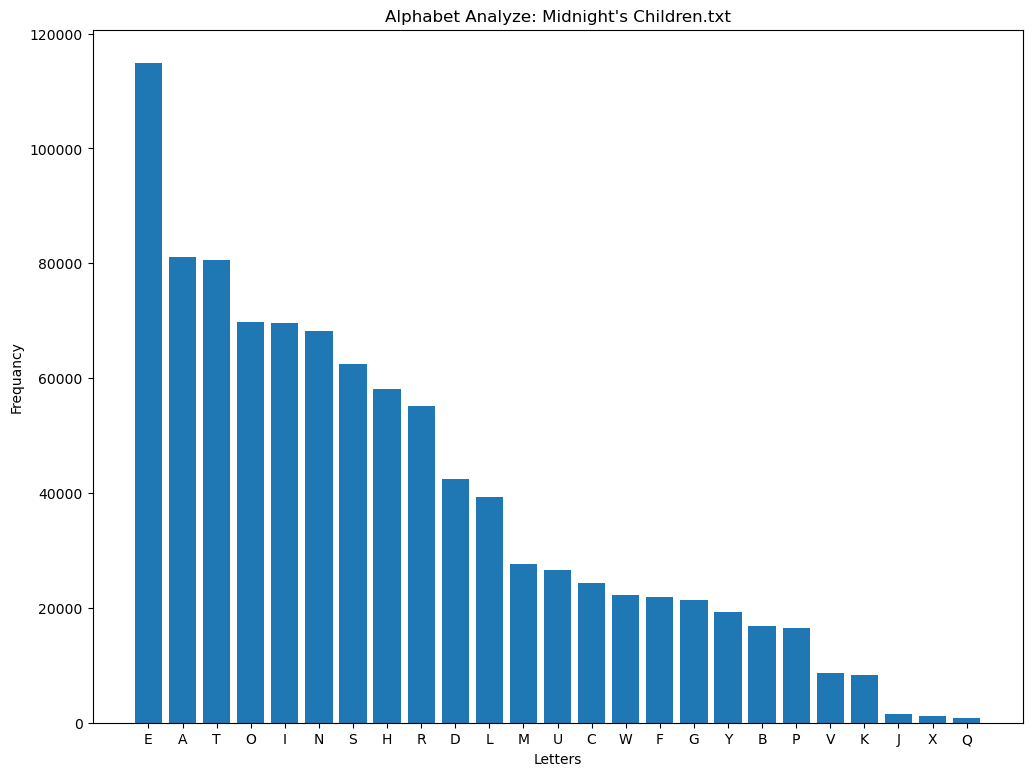

In [403]:
"""P-2.34
Write a Python program that inputs a document and then outputs a bar-chart plot of the frequencies of each alphabet character that appears in that document."""
import os
import matplotlib.pyplot as plt

class AlphabetAnalyzer: 
    """
    This class should have 4 functions:
    0. Scan all txt files in selected folder
    1. Initialize and read the document file, turn the file into analyzable format(type = str)
    2. Iterate the str var and count each alphabet appeared times.
    3. Plot a bar-chart to show the frequancies of each alphabet (aka. Output Process) 
    """
    def _scan_files(self, path='P2_34documents'):
        """Scan and return list of files in the given directory."""
        try:
            return [f for f in os.listdir(path) if f.endswith('.txt')]
        except FileExistsError:
            print(f"Directory {path} not found.")
            return []
            
    def read_file(self, path='P2_34documents', index=0):
        """Read file content, clean and prepare for analyze"""

        file_list = self._scan_files(path) 
    
        if not file_list:
            raise ValueError("No text file found in the directory.")
        
        print(file_list)    
        fp = os.path.join(path, file_list[index])

        with open(fp, mode='r', encoding="UTF-8") as f:
            # Only accept alphabet in uppercase, strip all symbol and space
            content = f.read().upper() 
            content = "".join(char for char in content if char.isalpha()) 
            
        return file_list[index], content
    
    def analyze_content(self, content):
        alpha_count = { chr(i): 0 for i in range(65, 90)}
        for char in content:
            if char in alpha_count:
                alpha_count[char] += 1
                
        return dict(sorted(alpha_count.items(), key=lambda val:val[1], reverse=True))
    
    def plotting_in_text_bar(self, fn, al_c:dict):
        max_count = max(al_c.values()) or 1
        print("ALPHABET ANALYZER:\n")
        print(f"{fn}")
        
        for key, val in al_c.items():
            #Drawing the plot
            if val:
                graphic_length = int( (val/max_count) * 50)
                print(f"{key}: {'#'* graphic_length }  {val}")
        
    def plotting_in_graph(self, fn, frequencies):
        plt.figure(figsize=(12,9))
        plt.bar(frequencies.keys(), frequencies.values())
        plt.title(f"Alphabet Analyze: {fn}")
        plt.xlabel('Letters')
        plt.ylabel('Frequancy')
        plt.show()
        
        
        
        
        
aa = AlphabetAnalyzer()
fn,c = aa.read_file(index=2)
frequency = aa.analyze_content(c)
aa.plotting_in_text_bar(fn, frequency)
aa.plotting_in_graph(fn, frequency)

In [417]:
"""P-2.35 Write a set of Python classes that can simulate an Internet application in which one party, Alice, is periodically creating a set of packets that she wants to send to Bob. An Internet process is continually checking if Alice has any packets to send, and if so, it delivers them to Bob’s computer, and Bob is periodically checking if his computer has a packet from Alice, and, if so, he reads and deletes it.
"""


"""
There will be three role: 
Alice, aka Sender, who creats packets and mark them as "Want to send"
Bob, aka Receiver, who needs to check, read and delete any packet from sender
Internet, aka Transporter, which constantly check sender's queue and sent packets to Receiver
"""


import time

class User:
    def __init__(self):
        self._packets_receive_queue = {}
        self._packets_send_queue = {}
    
    def _create(self):
        # Create packet
        pass
        
    def check_new(self):
        # Grasp packets from receive queue
        pass
    
    def check_send_queue(self):
        # Return the send queue as a dict
        return self._packets_send_queue
    
    def check_receive_queue(self):
        # Return the send queue as a dict
        return self._packets_receive_queue
    
    def send(self):
        # Add new packet to send queue
        pass
    
    def read(self,title):
        # unpack the packet and read the content
        pass
    
    def delete(self,title):
        # delete selected packets
        pass 
    
class Sender(User):
    def __init__(self):
        super().__init__()
    
    def _create(self):
        title = input('Input the title')
        if title == '':
            return 0
        content = input('Input the content')
        return {title: content}
    
    def send(self):
        packet = self._create()
        if not packet:
            print("Sender hasn't created any content.")
            
        else:
            self._packets_send_queue.update(packet)
            print(f"Send Queue: {self._packets_send_queue}")
        
    
    def clean_queue(self):
        self._packets_send_queue.clear()
    
           
class Receiver(User):
    def __init__(self):
        super().__init__()
        
    def check_receive_queue(self):
        return self._packets_receive_queue
    
    def check_new(self):
        return self._packets_receive_queue.keys() if self._packets_receive_queue else "Nothing new"
    
    def read(self, title):
        if not title:
            return "User cancelled reading"

        content = self._packets_receive_queue[title]
        return content if content else "Nothing in box" 
    
    def delete(self, title):
        if not title:
            return "User cancelled deleting"

        print(f'Title: {title} delete')
        self._packets_receive_queue.pop(title)
        
        
class Server:
    def __init__(self, sender, receiver):
        self._sender = sender
        self._receiver = receiver
    
    def check_queue(self):
        self._sender.check_send_queue()
    
    def transfer_que(self):
        transfer_dict = self._sender.check_send_queue()
        if not transfer_dict:
            print("No New Packet")
            print("Wait 1 min")
            time.sleep(5) # For demonstrate, only set 5 seconds.
            
        else:
            self._receiver.check_receive_queue().update(transfer_dict)
            print(self._receiver.check_receive_queue())
            self._sender.clean_queue()
            


alice = Sender()
bob = Receiver()
internet1 = Server(alice, bob)

while True:
    command = input()
    if command == 'q':
        break
    print(bob.check_new())
    alice.send()
    alice.send()
    print(bob.check_new())
    print(internet1.check_queue())
    print(internet1.transfer_que())
    print(bob.check_new())
    
    # Receiver read and delete
    
    t = input('Input read title.')
    print(f"Content: {bob.read(t)}")
    d = input('Input delete title.')
    bob.delete(d)
    bob.check_new()


        

Nothing new
Send Queue: {'111': '1113'}
Send Queue: {'111': '1113', '222': '2223'}
Nothing new
None
{'111': '1113', '222': '2223'}
None
dict_keys(['111', '222'])
Content: 1113
Title:  delete


KeyError: ''

In [ ]:
"""P-2.36 Write a Python program to simulate an ecosystem containing two types of creatures, bears and fish. The ecosystem consists of a river, which is modeled as a relatively large list. Each element of the list should be a Bear object, a Fish object, or None. In each time step, based on a random process, each animal either attempts to move into an adjacent list location or stay where it is. If two animals of the same type are about to collide in the same cell, then they stay where they are, but they create a new instance of that type of animal, which is placed in a random empty (i.e., previously None) location in the list. If a bear and a fish collide, however, then the fish dies (i.e., it disappears)."""


In [ ]:
"""P-2.37 Write a simulator, as in the previous project, but add a Boolean gender field and a floating-point strength field to each animal, using an Animal class as a base class. If two animals of the same type try to collide, then they only create a new instance of that type of animal if they are of different genders. Otherwise, if two animals of the same type and gender try to collide, then only the one of larger strength survives.
"""

In [ ]:
"""P-2.38 Write a Python program that simulates a system that supports the functions of an e-book reader. You should include methods for users of your system to “buy” new books, view their list of purchased books, and read their purchased books. Your system should use actual books, which have expired copyrights and are available on the Internet, to populate your set of available books for users of your system to “purchase” and read."""


In [ ]:
"""P-2.39 Develop an inheritance hierarchy based upon a Polygon class that has abstract methods area() and perimeter(). Implement classes Triangle, Quadrilateral, Pentagon, Hexagon, and Octagon that extend this base class, with the obvious meanings for the area() and perimeter() methods. Also implement classes, IsoscelesTriangle, EquilateralTriangle, Rectangle, and Square, that have the appropriate inheritance relationships. Finally, write a simple program that allows users to create polygons of the various types and input their geometric dimensions, and the program then outputs their area and perimeter. For extra effort, allow users to input polygons by specifying their vertex coordinates and be able to test if two such polygons are similar."""